In [115]:
import string
import numpy as np
import pandas as pd

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pickle
df = pickle.load( open( "../data/all_fed_speeches", "rb" ) )
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 0 to 734
Data columns (total 5 columns):
date       733 non-null datetime64[ns]
speaker    733 non-null object
title      733 non-null object
link       733 non-null object
text       733 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 34.4+ KB


In [5]:
doc_list = list(df['text'])

In [10]:
tfidvect =TfidfVectorizer(lowercase=True, 
                          stop_words='english',
                          max_features = 1000,
                          norm = 'l2',
                          use_idf = True,
                          smooth_idf=True,
                          sublinear_tf = False)
tfidf_vectorized = tfidvect.fit_transform(doc_list)

In [12]:
# checking stop words (which includes the cleared features from max_features)
stops = tfidvect.stop_words_
print(len(stops))


26767


In [13]:
# checking the vocabulary
vocab = tfidvect.vocabulary_
print(len(vocab))

1000


In [15]:
print(vocab)


{'china': 155, 'global': 391, 'economic': 284, 'important': 439, 'developments': 260, 'recent': 741, 'decades': 238, 'past': 642, 'years': 995, 'economy': 288, 'growth': 408, 'rate': 735, 'nearly': 593, '10': 1, 'percent': 649, 'year': 994, 'resulting': 790, 'output': 631, 'overall': 633, 'size': 856, 'today': 940, 'fourth': 374, 'largest': 505, 'world': 991, 'terms': 925, 'gross': 404, 'domestic': 276, 'product': 699, 'gdp': 387, 'current': 226, 'exchange': 321, 'rates': 736, 'second': 820, 'adjustments': 56, 'differences': 262, 'national': 589, 'strong': 890, 'performance': 651, 'improved': 442, 'standards': 878, 'people': 648, 'estimates': 313, 'million': 573, 'reforms': 753, 'began': 106, '2004': 18, 'life': 523, 'fallen': 342, '000': 0, 'measures': 564, 'remains': 769, 'developing': 258, 'nation': 588, 'particular': 640, 'average': 94, 'household': 430, 'consumption': 198, 'remain': 767, 'quite': 729, 'low': 543, 'areas': 80, 'challenge': 148, 'high': 418, 'stable': 874, 'developm

In [16]:
tfidf_arr = tfidf_vectorized.toarray()
tfidf_arr[0:10,0:10]

array([[0.0120277 , 0.01952326, 0.00467892, 0.00867747, 0.0050535 ,
        0.01041692, 0.01029846, 0.01116975, 0.00570364, 0.00558488],
       [0.        , 0.01840275, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01316085, 0.01344071, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.0350087 , 0.00757678, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.01659447, 0.01325669, 0.01229286, 0.014318  ,
        0.01475704, 0.02188383, 0.03164706, 0.01616001, 0.01582353],
       [0.        , 0.00852611, 0.0204335

1. For 4 groups (classes) of the 20newsgroups corpus (your choice), find the 10 most important words by:
    * total tf-idf score
    * average tf-idf score (average only over non-zero values)
    * highest tf (only) score across corpus (try using `use_idf = False` in `TfidfVectorizer` )


In [17]:
def get_top_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the highest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["cat", "pig"]
    '''
    return [labels[i] for i in np.argsort(lst)[-1:-n-1:-1]]

In [18]:
# finding average tf-idf score in the vocabulary
avg = np.sum(tfidf_arr, axis=0) / np.sum(tfidf_arr > 0, axis=0)
print("top 50 by average tf-idf")
l_avg = list(avg)
v_words = list(vocab.keys())
print(get_top_values(l_avg, 50, v_words))

top 50 by average tf-idf
['saving', 'purchase', 'education', 'expect', 'loan', 'bound', 'governments', 'effective', 'second', 'efforts', 'looking', 'wide', 'short', 'scope', 'fed', 'release', 'reduce', 'rates', 'value', 'exchange', 'direct', 'requirements', 'payments', 'companies', 'essential', 'path', 'subject', 'considerable', 'international', 'certain', 'pressure', 'encourage', 'practices', 'analysis', 'necessarily', 'moderate', 'flows', 'reducing', 'flow', 'institutional', 'current', 'ways', 'actual', 'liquid', 'fixed', 'faster', 'reform', 'simple', 'similar', 'ensure']


In [22]:
# finding total tf-idf scrore
total = np.sum(tfidf_arr, axis=0)
print("top 10 by total tf-idf")
print(get_top_values(total, 50, v_words))


top 10 by total tf-idf
['expect', 'value', 'purchase', 'looking', 'practices', 'subject', 'direct', 'institutional', 'requirements', 'release', 'moderate', 'state', 'education', 'reducing', 'ways', 'counterparties', 'issue', 'fixed', 'corporate', 'simple', 'internal', 'data', 'challenges', 'tool', 'analysis', 'term', 'extended', 'reduced', 'relatively', 'certain', 'common', 'council', 'spending', 'path', 'short', 'deposits', 'develop', 'systemic', 'congress', 'information', 'dodd', '2013', 'making', 'used', 'staff', 'similar', 'following', 'understanding', 'activities', 'balance']


In [33]:
# HIGHEST tfidf across corpus
# redo vectorization without using idf
vectorizer2 = TfidfVectorizer(use_idf=False, max_features=1000)
# make documents into one giant document for this purpose
vectors2 = vectorizer2.fit_transform(["\n".join(doc_list)]).toarray()

vocab2 = vectorizer2.vocabulary_
words = list(vocab2.keys())
print("Here is the length of the new vocab: ", len(vocab2))
print("top 10 by tf across all corpus")
print(get_top_values(vectors2[0], 50, words))


Here is the length of the new vocab:  1000
top 10 by tf across all corpus
['clearing', '25', 'deposits', 'or', 'many', 'mandate', 'effective', 'payments', 'areas', 'provided', 'credit', 'maintain', 'consumption', 'level', 'state', '2012', 'range', 'curve', 'avoid', 'development', 'existing', 'make', 'economists', 'needs', 'contrast', 'macroeconomic', 'reserve', 'hope', 'prudential', 'text', 'promote', 'derivatives', 'recovery', 'so', '000', 'office', 'how', 'me', 'factor', 'primary', 'mid', 'bound', 'face', 'nature', 'back', '2008', 'was', 'our', 'out', 'open']


In [31]:
print(type(vectors2))

<class 'numpy.ndarray'>


In [32]:
print(type(words))

<class 'list'>


In [34]:
whos

Variable            Type                Data/Info
-------------------------------------------------
CountVectorizer     type                <class 'sklearn.feature_e<...>on.text.CountVectorizer'>
PorterStemmer       ABCMeta             <class 'nltk.stem.porter.PorterStemmer'>
RegexpTokenizer     ABCMeta             <class 'nltk.tokenize.regexp.RegexpTokenizer'>
SnowballStemmer     ABCMeta             <class 'nltk.stem.snowball.SnowballStemmer'>
TfidfVectorizer     type                <class 'sklearn.feature_e<...>on.text.TfidfVectorizer'>
WordNetLemmatizer   type                <class 'nltk.stem.wordnet.WordNetLemmatizer'>
avg                 ndarray             1000: 1000 elems, type `float64`, 8000 bytes
df                  DataFrame                     date           <...>n\n[733 rows x 5 columns]
doc_list            list                n=733
get_top_values      function            <function get_top_values at 0x1a13caaae8>
l_avg               list                n=1000
np           

In [37]:
df['date'].iloc[0:5]


0   2006-12-15
1   2006-12-01
2   2006-12-01
3   2006-11-30
4   2006-11-28
Name: date, dtype: datetime64[ns]

In [38]:
import datetime

In [39]:
this_date = datetime.datetime(2006, 12, 15)

In [40]:
print(this_date)

2006-12-15 00:00:00


In [82]:
def create_speech_list(df, date):
    df2 = df[df['date']<= date]
    return df2

In [83]:
df2 = create_speech_list(df, this_date)

In [84]:
df2.tail()

,date,speaker,title,link,text
421,2012-01-16,Governor Elizabeth A. Duke,From Community Banker to Central Banker--My Jo...,/newsevents/speech/duke20120116a.htm,\n It is certainly a pleasure to be here...
422,2012-01-13,Governor Elizabeth A. Duke,Opportunities to Reduce Regulatory Burden and ...,/newsevents/speech/duke20120113a.htm,\n It's a pleasure to be here this morni...
423,2012-01-07,Governor Sarah Bloom Raskin,Creating and Implementing an Enforcement Respo...,/newsevents/speech/raskin20120107a.htm,\n Thank you and happy New Year. It is a...
424,2012-01-06,Governor Sarah Bloom Raskin,Community Bank Examination and Supervision ami...,/newsevents/speech/raskin20120106a.htm,\n Thank you for the opportunity to spea...
425,2012-01-06,Governor Elizabeth A. Duke,"Economic Developments, Risks to the Outlook, a...",/newsevents/speech/duke20120106a.htm,"It is the start of a new year, the traditional..."


In [46]:
len(df2)

73

In [48]:
df2.iloc[0:3]

,date,speaker,title,link,text
0,2006-12-15,Chairman Ben S. Bernanke,The Chinese Economy: Progress and Challenges,/newsevents/speech/bernanke20061215a.htm,The emergence of China as a global economic po...
1,2006-12-01,Vice Chairman Donald L. Kohn,Monetary Policy and Uncertainty,/newsevents/speech/kohn20061201a.htm,Tonight I will talk about one of the themes of...
2,2006-12-01,Chairman Ben S. Bernanke,Welcoming remarks,/newsevents/speech/bernanke20061201a.htm,"Vice President Papademos, ladies and gentlemen..."


In [85]:
def create_speech_list(df, this_date, numb_speeches):
    '''
    For a given date, the most recent speeches are returned in a dataframe

    INPUTS:
        df - the dataframe of all fed speeches
        date - the date needed to include no speeches before
        num_speeches - the number of most recent speeches to include
    OUTPUT:
        dataframe - this is a subset of the original dataframe with same columns
    '''
    filtered_df = df[df['date']<= this_date].copy()
    if len(filtered_df)> numb_speeches:
        filtered_df = filtered_df.iloc[-1:-numb_speeches-1:-1]
    return filtered_df


In [97]:
this_date = datetime.datetime(2018, 9, 21)

In [98]:
df3 = create_speech_list(df, this_date, 100)
df3.head()

,date,speaker,title,link,text
716,2018-01-19,Vice Chairman for Supervision Randal K. Quarles,Early Observations on Improving the Effectiven...,/newsevents/speech/quarles20180119a.htm,It is a pleasure to be here with you at the Am...
715,2018-02-13,Chairman Jerome H. Powell,Remarks at the Ceremonial Swearing-in,/newsevents/speech/powell20180213a.htm,It is both humbling and a great privilege to b...
714,2018-02-22,Vice Chairman for Supervision Randal K. Quarles,The U.S. Economy after the Global Financial Cr...,/newsevents/speech/quarles20180222a.htm,I am very happy to be participating in this sy...
713,2018-02-26,Vice Chairman for Supervision Randal K. Quarles,An Assessment of the U.S. Economy,/newsevents/speech/quarles20180226a.htm,Thank you for the opportunity to take part in ...
712,2018-02-26,Vice Chairman for Supervision Randal K. Quarles,Brief Thoughts on the Financial Regulatory Sys...,/newsevents/speech/quarles20180226b.htm,Thank you very much for having me here at the ...


In [111]:
df.iloc[717]

date                                     2019-03-11 00:00:00
speaker                               Chair Jerome H. Powell
title                                          Brief Remarks
link                  /newsevents/speech/powell20190311a.htm
text       Good evening, and thank you for inviting me to...
Name: 719, dtype: object

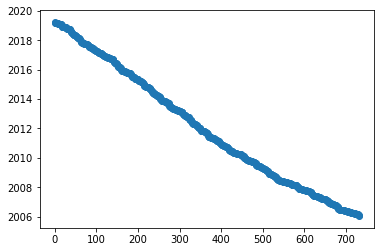

In [120]:
## are my dates in line?
temp = df['date']
x = np.arange(len(temp))
plt.scatter(x, temp)

In [118]:
# sorting the dataframe and resetting the index
df.sort_values(by=['date'], ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)

In [119]:
df.head()

,date,speaker,title,link,text
0,2019-03-25,Governor Michelle W. Bowman,Welcoming Remarks,/newsevents/speech/bowman20190325a.htm,Good afternoon. It is a great pleasure for me ...
1,2019-03-12,Governor Lael Brainard,The Community Reinvestment Act: How Can We Pre...,/newsevents/speech/brainard20190312a.htm,It is a pleasure to have an opportunity to dis...
2,2019-03-11,Chair Jerome H. Powell,Brief Remarks,/newsevents/speech/powell20190311a.htm,"Good evening, and thank you for inviting me to..."
3,2019-03-08,Chair Jerome H. Powell,Monetary Policy: Normalization and the Road Ahead,/newsevents/speech/powell20190308a.htm,Thank you for the opportunity to speak here to...
4,2019-03-07,Governor Lael Brainard,Navigating Cautiously,/newsevents/speech/brainard20190307a.htm,While our economy continues to add jobs at a s...


In [61]:
numb_speeches = 5
df3 = create_speech_list(df, this_date, numb_speeches)

In [69]:
tt = df[df['date']<= this_date]
tt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422 entries, 0 to 425
Data columns (total 5 columns):
date       422 non-null datetime64[ns]
speaker    422 non-null object
title      422 non-null object
link       422 non-null object
text       422 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 19.8+ KB


In [70]:
tx = tt.iloc[0:10]
tx

,date,speaker,title,link,text
0,2006-12-15,Chairman Ben S. Bernanke,The Chinese Economy: Progress and Challenges,/newsevents/speech/bernanke20061215a.htm,The emergence of China as a global economic po...
1,2006-12-01,Vice Chairman Donald L. Kohn,Monetary Policy and Uncertainty,/newsevents/speech/kohn20061201a.htm,Tonight I will talk about one of the themes of...
2,2006-12-01,Chairman Ben S. Bernanke,Welcoming remarks,/newsevents/speech/bernanke20061201a.htm,"Vice President Papademos, ladies and gentlemen..."
3,2006-11-30,Governor Susan Schmidt Bies,A U.S. Perspective on Basel II Implementation,/newsevents/speech/bies20061130a.htm,Good afternoon. Thank you for the invitation t...
4,2006-11-28,Chairman Ben S. Bernanke,The Economic Outlook,/newsevents/speech/bernanke20061128a.htm,Thank you for inviting me to speak today. I wi...
5,2006-11-21,Governor Kevin Warsh,Financial Markets and the Federal Reserve,/newsevents/speech/warsh20061121a.htm,Thank you for inviting me to speak about the r...
6,2006-11-16,Governor Randall S. Kroszner,The Conquest of Worldwide Inflation: Currency ...,/newsevents/speech/kroszner20061116a.htm,\n I am delighted to speak at the Cato M...
7,2006-11-10,Chairman Ben S. Bernanke,Monetary Aggregates and Monetary Policy at the...,/newsevents/speech/bernanke20061110a.htm,My topic today is the role of monetary aggrega...
8,2006-11-03,Vice Chairman Donald L. Kohn,The Evolving Role of the Federal Reserve Banks,/newsevents/speech/kohn20061103a.htm,I am pleased to have the opportunity to speak ...
9,2006-11-02,Governor Susan S. Bies,The Economic Outlook,/newsevents/speech/bies20061102a.htm,Thank you for inviting me to speak with you to...
